In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

In [3]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
iris            = pd.read_csv("/content/drive/My Drive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Algoritmos (Reg, KNN, SVM, DT, RNN, PCA,KMeans...)/SVM Estatidados/data/iris.csv")
lenses          = pd.read_csv("/content/drive/My Drive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Algoritmos (Reg, KNN, SVM, DT, RNN, PCA,KMeans...)/SVM Estatidados/data/lenses_final.csv")
car             = pd.read_csv("/content/drive/My Drive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Algoritmos (Reg, KNN, SVM, DT, RNN, PCA,KMeans...)/SVM Estatidados/data/cars.csv")
horsecolic      = pd.read_table("/content/drive/My Drive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Algoritmos (Reg, KNN, SVM, DT, RNN, PCA,KMeans...)/SVM Estatidados/data/horse-colic.data")

<h2 style="text-align:center; margin:40px"> Máquinas de Vetores de Suporte (SVM) </h2>

Imagine que estejam construindo uma rua em seu bairro e o prefeito quer que ela seja o mais larga possível, de forma a separar as casas do lado direito e esquerdo da rua. O que o SVM busca fazer é muito similar a isso, encontrar as margens mais disnte possíveis entre si que separem os exemplos de cada uma das classes. A reta no centro destas margens (ou seja, a faixa que separa as duas mãos da nossa rua), é a nossa superfície de decisão.

![](img/svm.png)

O algoritmo de <b>SVM</b> tem como objetivo encontrar a <b>superfície separadora (hiperplano) que maximiza a distância entre as margens</b> (retas tracejadas). Isso permite separar as duas classes da melhor maneira possível.

<h4> Equação do Plano (2D): $ax + by + c = 0$ </h4>

<h4> Podemos re-escrever como: $w_1x_1 + w_2x_2 + b = 0$ </h4>

<h4> Equação do Plano (m dimensões): $w \cdot x + b = 0$ </h4>

<h4> As duas margens são dadas por: $w \cdot x + b = \pm1$ </h4>

<h4> Distância entre as margens: $d = \frac{2}{||w||}$ </h4>

<h4> Então nosso objetivo é:<br/>$\min_{w}{||w||}$ <br/>sujeito a $y_i (w \cdot x_i + b) >= 1$</h4>

<h4> Para permitir pequenos erros, adicionamos variáveis de folga:
<br/>$\min_{w,\eta}{||w||} + C\sum{\eta_i}$ <br/>sujeito a $y_i (w \cdot x_i + b) >= 1 - \eta_i$</h4>

<h3 style="text-align:center; margin:40px"> E se não houver separação linear entre as duas classes? </h3>

<h4>Kernel Trick</h4>
É o nome dado para uma técnica que envolve mapear os dados para um espaço diferente, geralmente de dimensão mais alta, de forma que neste espaço os dados sejam linearmente separáveis. Ou seja, substituímos cada $x_i$ por $\phi(x_i)$

![](img/kernel1.png)

<h4> O novo espaço pode ter dimensão infinita! </h4>
Não precisamos de fato mapear os pontos no novo espaço! Para resolver o SVM, basta conhecer o produto escalar das observações no novo espaço, ou seja, o resultado de $\phi(x_i)\cdot\phi(x_j)$, que geralmente chamamos de <b>Kernel</b>:

$K(x_i, x_j) = \phi(x_i)\cdot\phi(x_j)$

<h4> Principais kernels: </h4>
<ul>
    <li>Linear: $K(x_i, x_j) = x_i \cdot x_j$</li>
    <li>Polinomial: $K(x_i, x_j) = (\delta(x_i \cdot x_j) + k)^d$</li>
    <li>Gaussiano: $K(x_i, x_j) = e^{-\gamma||x_i-x_j||^2}$</li>
    <li>Sigmoidal: $K(x_i, x_j) = tanh(\delta(x_i \cdot x_j) + k)$</li>
</ul>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha do <b>kernel</b> e dos parâmetros é <b>muito</b> importante para o resultado do algoritmo.

In [5]:
from sklearn.svm import SVC

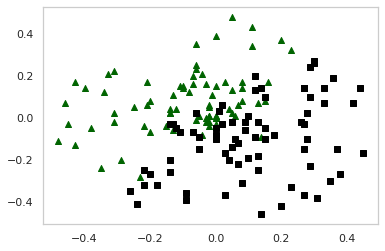

In [8]:
baseDados = pd.read_csv('/content/drive/My Drive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/Algoritmos (Reg, KNN, SVM, DT, RNN, PCA,KMeans...)/SVM Estatidados/data/base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

In [9]:
#SVM = SVC(kernel = 'linear', C = 1)
SVM = SVC()
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
SVM.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

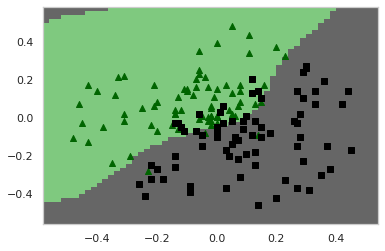

In [10]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = SVM.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

Vamos nos prender em dataset bi-dimensionais, pois isso nos permitirá uma ampla visualização do que acontece por baixo dos panos nesses classificadores. Poderemos visualizar os pontos no espaço de busca/classificação e as superfícies de decisão. No final do tutorial aplicaremos esses métodos a problemas com mais dimensões. Vocês verão que o código é exatamente o mesmo para estes casos.

Observe a imagem abaixo, extraída do livro Introduction to Statistical Learning. Neste caso desejamos separar os pontos da classe azul dos pontos da classe roxa. As duas retas pontilhadas são as margens de cada classe (que o SVM busca aprender), enquanto a reta contínua é nossa superície de decisão.

<img src='https://github.com/Afmansano/Codes/blob/master/Scikit%20Book/images/svm_margin.png?raw=1' width="300">

Antes de entrar em mais detalhes da explicação matemática do SVM, vamos executá-lo novamente com o Scikit Learning utilizando um dataset clássico, o Iris. Neste modelo vamos classificar se uma íris (flor) é do tipo Setosa ou Versicolor

In [11]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [12]:
iris = datasets.load_iris()

In [13]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  #dimensoes da petala
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) #selecionamos apenas os dois tipos que temos interesse
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [14]:
svm_clf = SVC(C=100, kernel='linear')
svm_clf.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
svm_clf.predict([[2.5, 1.1]])

array([1])

Vamos visualizar esses dados para entender melhor o comportamento do nosso classificador.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # a reta de nossa superfície de decisão tem como equacao w0*x0 + w1*x1 + b = 0, logo
    # x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1] #todos os valores de x1 em funcao dos valores de x0 na sup de decisao
    
    margin = 1/w[1] #estamos desenhando a superficie em funcao de x1, logo a margem também sera em funcao dele, por isso divido por 1/w[1], que é o deslocamento da superficie de decisao para as maregsn
    margin_up = decision_boundary + margin
    margin_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, margin_up, "k--", linewidth=2)
    plt.plot(x0, margin_down, "k--", linewidth=2)

(0.0, 5.5, 0.0, 2.0)

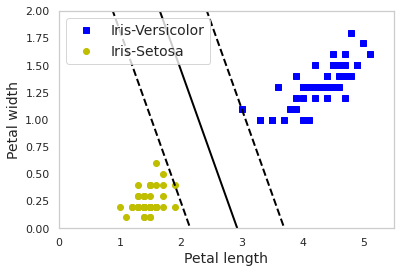

In [18]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.axis([0, 5.5, 0, 2])


Note que o nosso modelo conseguiu aprender um hiperplano de separação entre as duas classes, que fica exatamente no centro das duas margens máximas encontradas por ele. Desta forma a, superfície de decisão encontrada é aquela que fica o mais distante possível das duas classes.

Observe que o parâmetro C=100 foi empregado no nosso modelo. Essa parâmtro indica o quão rigoroso eu desejo que o modelo seja em relação a violações à margem, ou seja, a pontos que fiquem do lado oposto à margem encontrada para sua classe. Isto é importante pois em alguns casos pode ser que não seja possível encontrar uma margem que separe todos os pontos, ou, se essa margem existir, ela seja muito pequena, tornando a generalização do modelo para novos exemplos muito ruim. Um outro problema que pode ser causado com um hiperparâmetro muito rigoroso é gerar uma grande sensibilidade a outliers.

Observe como ficaria nosso modelo com um parâmetro C=0.1

In [19]:
svm_clf = SVC(C=0.1, kernel='linear')
svm_clf.fit(X, y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(0.0, 5.5, 0.0, 2.0)

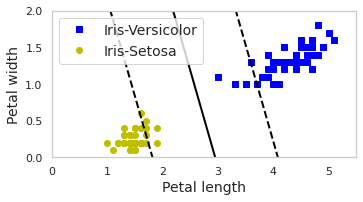

In [20]:
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.axis([0, 5.5, 0, 2])

Note que neste caso estamos sendo mais permissivos, o que nos gera margens maiores.

Observe o que aconteceria se houvesse um outlier no nosso modelo

In [21]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
X1_with_outlier = np.concatenate([X, X_outliers[:1]], axis=0)
y1_with_outlier = np.concatenate([y, y_outliers[:1]], axis=0)
X2_with_outlier = np.concatenate([X, X_outliers[1:]], axis=0)
y2_with_outlier = np.concatenate([y, y_outliers[1:]], axis=0)

In [22]:
svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(X2_with_outlier, y2_with_outlier)

SVC(C=1000000000, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

(0.0, 5.5, 0.0, 2.0)

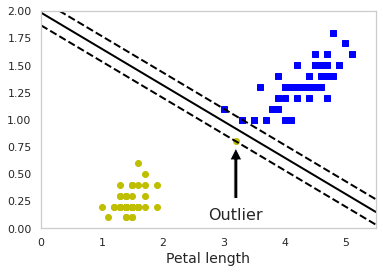

In [23]:
plt.plot(X2_with_outlier[:, 0][y2_with_outlier==1], X2_with_outlier[:, 1][y2_with_outlier==1], "bs")
plt.plot(X2_with_outlier[:, 0][y2_with_outlier==0], X2_with_outlier[:, 1][y2_with_outlier==0], "yo")
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

Note como neste caso nossa margem se tornou extramemente pequena devido apenas a um exemplo. Isto pode causar erros de classificação durante o processo de produção, pois o modelo não conseguirá classificar corretamente um ponto da classe azul que esteja mais mais deslocado sentido classe amararela.

Uma outra técnica importante de ser empregada com o SVM é escalar (normalizar subtraindo a média e dividindo pelo desvio padrão) os dados. Este método é muito sensível à escala, uma vez que busca maximizar a margem de separação utilizando uma métrica de distância do ponto à margem, ele provavelmente irá negligenciar features com pequenas dimensões, enquanto features com valores altos dominarão o cálculo da distância. Veja o exemplo abaixo:

In [24]:
from sklearn.preprocessing import StandardScaler

(-2.0, 2.0, -2.0, 2.0)

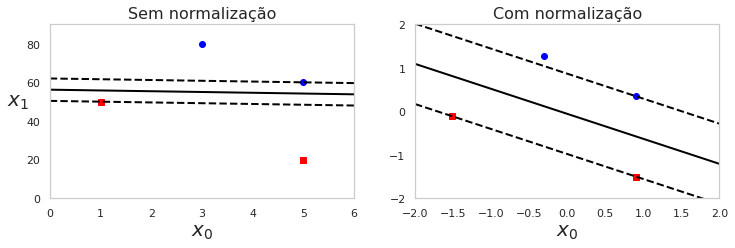

In [25]:
X_new = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
y_new = np.array([0, 0, 1, 1])

svm_clf2 = SVC(kernel="linear", C=100)
svm_clf2.fit(X_new, y_new)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X_new[:, 0][y_new==1], X_new[:, 1][y_new==1], "bo")
plt.plot(X_new[:, 0][y_new==0], X_new[:, 1][y_new==0], "rs")
plot_svc_decision_boundary(svm_clf2, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Sem normalização", fontsize=16)
plt.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
svm_clf2.fit(X_scaled, y_new)

plt.subplot(122)
plt.plot(X_scaled[:, 0][y_new==1], X_scaled[:, 1][y_new==1], "bo")
plt.plot(X_scaled[:, 0][y_new==0], X_scaled[:, 1][y_new==0], "rs")
plot_svc_decision_boundary(svm_clf2, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Com normalização", fontsize=16)
plt.axis([-2, 2, -2, 2])

Observe que a escala da feature $x_1$ na imagem da esquerda é muito maior que a da feature $x_0$, e que a margem do modelo sem normalização é significativamente menor (em proporção) e horizontal, uma vez que $x_1$ está dominando o cálculo da distância.Note também que no segundo caso mais pontos participam da margem (são vetores de suporte), já que a feature $x_0$ passa a contribuir igualmente para o cálculo de distânca.

No exemplo utilizando o dataset Iris, acima, não normalizamos o dados apenas para fins didádicos de facilitar a visualização.

<h5>Como o SVM classifica os dados?</h5>

Matematicamente, após treinado o modelo, a tarefa de classificação do SVM é bem simples e segue de acordo com a equação abaixo: 

$
\begin{equation}
  y^{(i)}_{predito} ==\left\{
  \begin{array}{@{}ll@{}}
    0, & \text{se}\ w_1x_1 + w_2x_2 + \dots + w_mx_m + b <  0 \\
    1, & \text{se}\ w_1x_1 + w_2x_2 + \dots + w_mx_m + b \geq 0 
  \end{array}\right.
\end{equation}
$

Ou, de forma vetorial

$
\begin{equation}
  \hat{y} ==\left\{
  \begin{array}{@{}ll@{}}
    0, & \text{se}\ W^T\cdot  x + b <  0 \\
    1, & \text{se}\ W^T\cdot x + b \geq  0  
  \end{array}\right.
\end{equation}
$

onde $W$ e $b$ são os coeficientes da superfície de decisão, encontrados pelo SVM.

Vamos ver um exemplo para os pontos $x_1 = (1.5, 0.7)$ e $x_2 = (4.1, 1.1)$, em destaque no gráfico seguinte.

In [26]:
x1 = [1.5, 0.7]
x2 = [4.1, 1.1]

svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(0.0, 5.5, 0.0, 2.0)

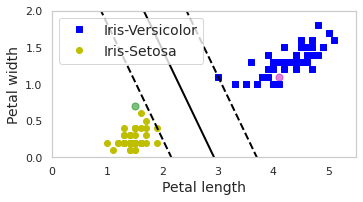

In [27]:
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.scatter(x1[0], x1[1], s=50, alpha=0.5, c="g")
plt.scatter(x2[0], x2[1], s=50, alpha=0.5, c="m")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.axis([0, 5.5, 0, 2])

Vamos implementar manualmente o cálculo de classificação do SVM, porém com o Scikit podemos obter a classe rapidamente utilizando o método predict()

In [28]:
score = np.dot(svm_clf.coef_, x1) + svm_clf.intercept_
classe = 1 if score > 0 else 0
print("O ponto " + str(x1) + " pertence à classe " + str(classe) + " com score " + str(score[0]))

O ponto [1.5, 0.7] pertence à classe 0 com score -1.2705880621833523


In [29]:
score = np.dot(svm_clf.coef_, x2) + svm_clf.intercept_
classe = 1 if score > 0 else 0
print("O ponto " + str(x2) + " pertence à classe " + str(classe) + " com score " + str(score[0]))

O ponto [4.1, 1.1] pertence à classe 1 com score 2.4235289837112677


Mas matematicamente, o que isto quer dizer?

A nossa função de decisão $h = W^T\cdot x + b$ pode ser visualizada no gráfico abaixo (plano azul hachurado). Quando calculamos o valor de $h$ estamos gerando um score que obedece a regra de classificação do SVM (foi a partir desta regra que ele encontrou os parâmetros $W$) de acordo com as posição do exemplo em questão no espaço multidimensional. Observe que nossa superfície de decisão é o plano onde $h = 
0$ e a nosso limite de decisão (decision boundery) é o hiperplano (reta no nosso caso) onde as duas regiões em destaque se cruzam.

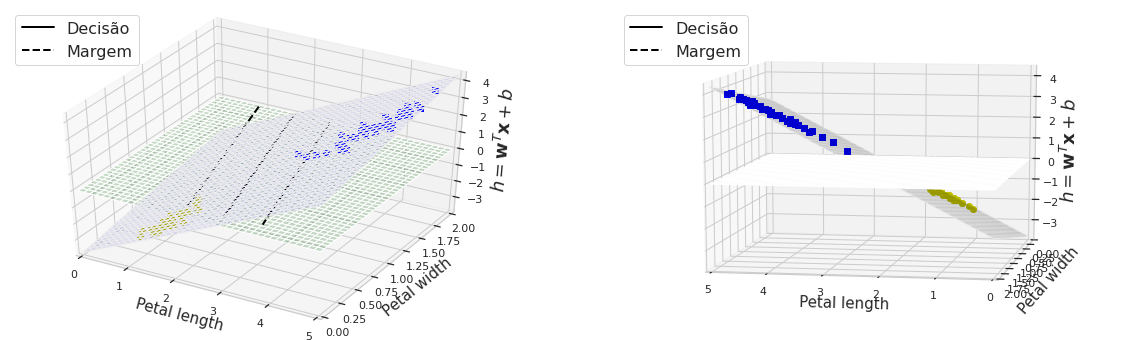

In [30]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[0, 5.0], x2_lim=[0, 2.0], plot_margin=True):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 40)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 40)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    if plot_margin:
        boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
        margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
        margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
        boundary_in_bounds = (boundary_x2s > x1_lim[0]) & (boundary_x2s <= x2_lim[1])
        m1_in_bounds = (margin_x2s_1 > x1_lim[0]) & (margin_x2s_1 < x2_lim[1])
        m2_in_bounds = (margin_x2s_2 > x1_lim[0]) & (margin_x2s_2 < x2_lim[1])
        ax.plot(x1s[boundary_in_bounds], boundary_x2s[boundary_in_bounds], 0, "k-", linewidth=2, label=r"Decisão")
        ax.plot(x1s[m1_in_bounds], margin_x2s_1[m1_in_bounds], 0, "k--", linewidth=2, label=r"Margem")
        ax.plot(x1s[m2_in_bounds], margin_x2s_2[m2_in_bounds], 0, "k--", linewidth=2)
    scores_1 = svm_clf.decision_function(X_crop[y_crop==1])
    scores_2 = svm_clf.decision_function(X_crop[y_crop==0])
    ax.plot_surface(x1, x2, df, alpha=0.1, color="b")
    ax.plot_wireframe(x1, x2, df, alpha=0.05, color="k")
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                color="g", alpha=0.2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], scores_1, "bs")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], scores_2, "yo")
    ax.axis(x1_lim + x2_lim)
    ax.set_xlabel(r"Petal length", fontsize=15)
    ax.set_ylabel(r"Petal width", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)
    

fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.elev = 40
plot_3D_decision_function(ax1, w=svm_clf.coef_[0], b=svm_clf.intercept_[0], plot_margin=True)

ax2 = fig.add_subplot(122, projection='3d')
ax2.elev = 10
ax2.azim = 100
plot_3D_decision_function(ax2, w=svm_clf.coef_[0], b=svm_clf.intercept_[0], plot_margin=True)

<h3>Obtendo probabilidades</h3>

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
svm_clf_probs = SVC(kernel="linear", probability=True)
svm_clf_probs.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
svm_scores = svm_clf_probs.decision_function(X)
svm_scores_expanded = np.expand_dims(svm_scores, axis=1)

In [34]:
lr = LogisticRegression()
lr.fit(svm_scores_expanded, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
lr.predict_proba(svm_scores_expanded)[0:10]

array([[0.98796078, 0.01203922],
       [0.98796078, 0.01203922],
       [0.99077195, 0.00922805],
       [0.98430678, 0.01569322],
       [0.98796078, 0.01203922],
       [0.96299938, 0.03700062],
       [0.98574713, 0.01425287],
       [0.98430678, 0.01569322],
       [0.98796078, 0.01203922],
       [0.98674113, 0.01325887]])

In [36]:
svm_clf_probs.predict_proba(X)[0:10]

array([[0.98111897, 0.01888103],
       [0.98111897, 0.01888103],
       [0.9850595 , 0.0149405 ],
       [0.97614781, 0.02385219],
       [0.98111897, 0.01888103],
       [0.94904704, 0.05095296],
       [0.97809006, 0.02190994],
       [0.97614781, 0.02385219],
       [0.98111897, 0.01888103],
       [0.97944309, 0.02055691]])

O SVM funciona muito bem em muitos casos, porém quase todos os datasets não são linearmente separáveis. Uma abordagem para lidar com este problema é a utilização de features polinomiais, assim como fazemos com regressão linear (polinomial). Veja o exemplo abaixo. Como separar estes dados utilizando o SVM?

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
c1 = np.array([-4, -3, 3, 4])
c2 = np.array([-2, -1, 0, 1, 2])

([], <a list of 0 Text major ticklabel objects>)

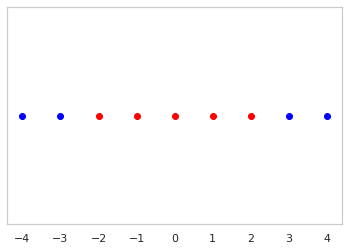

In [39]:
plt.scatter(x=c1, y=np.zeros_like(c1), c='blue')
plt.scatter(x=c2, y=np.zeros_like(c2), c='red')
plt.yticks([])

Se aumentarmos uma dimensão no nosso espaço, adicionando uma feature $x_2 = x^2$, projetamos nossos dados em um espaço onde eles são linearmente separáveis.

In [40]:
c1_2 = c1**2
c2_2 = c2**2

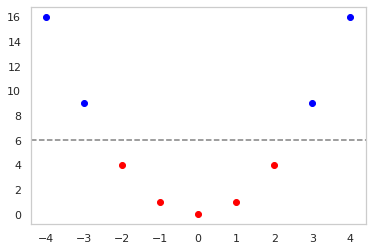

In [41]:
plt.scatter(x=c1, y=c1_2, c='blue')
plt.scatter(x=c2, y=c2_2, c='red')
plt.axhline(y=6, ls='--', c='gray')

Utilizando o Scikit-Learn conseguimos implementar o SVM com essa característica facilmente, é só adicionarmos o PolynomialFeatures a nosso pipeline:

In [42]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [43]:
polynomial_svm_clf = Pipeline([
    ("poly_fetaures", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [44]:
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_fetaures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

Adicionar features polinomiais funciona muito bem na maioris dos algoritmos de Machine Learning (não apenas não apenas no SVM), porém um polinômio de baixo grau não é capaz de lidar com problemas complexos e polinômios de graus muito altos geram um número muito grande de features, prejudicando a performance do modelo. O svm nos permite aplicar quase todas as técnincas matemáticas sem necessariamente adicionarmos dimensões a nosso espaço, apenas modificando as métricas de distância/similaridade por meio dos <b>kernel tricks</b>, evitando a explosão combinatória do número de features.

In [45]:
from sklearn.svm import SVC

In [46]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

In [47]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Uma outra forma de lidarmos com problemas não lineares é criarmos features de semelhança computadas por meio de uma função de similaridade. A Gaussian Radial Bases Function (RBF) é um exemplo de função de similaridade :


$\phi\gamma(x, \ell) = exp(-\gamma\|x-\ell\|^2)$

que é uma função gaussiana (simétrica em forma de sino) que assume valores entra 0 e 1

Voltando ao nosso primeiro conjunto de dados:

In [48]:
x1 = -1

([], <a list of 0 Text major ticklabel objects>)

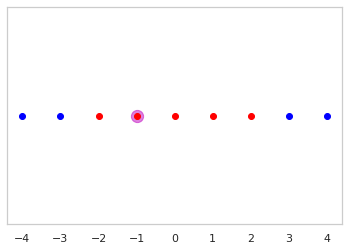

In [49]:
plt.scatter(x=c1, y=np.zeros_like(c1), c='blue')
plt.scatter(x=[-1], y=[0], s=150, alpha=0.5, c="m")
plt.scatter(x=c2, y=np.zeros_like(c2), c='red')
plt.yticks([])

Vamos analisar este exemplo em relação a dois pontos de referência, $\ell_1 = -2$ e $\ell_2 = 1$. O exemplo $x_1 = -1$ (em destaque) está originalmente localizado a uma distância 1 da primeira referência e 2 da segunda. Porém suas novas features são $x_{1,1} =exp(-0.3\times 1^2) \approx 0.74$ e $x_{1,2} =exp(-0.3\times 2^2) \approx 0.30$ Como pode ser visto no gráfico abaixo, com isso elas são linearmente separáveis.

In [50]:
def gaussian_rbf(x, ell, gamma=0.3):
    return np.exp(-gamma * np.linalg.norm(x-ell)**2)

In [51]:
c1_g1 = np.array([gaussian_rbf(x,-2) for x in c1])
c1_g2 = np.array([gaussian_rbf(x, 1) for x in c1])
c2_g1 = np.array([gaussian_rbf(x,-2) for x in c2])
c2_g2 = np.array([gaussian_rbf(x, 1) for x in c2])

In [52]:
x1_g = gaussian_rbf(x1, -2)
x2_g = gaussian_rbf(x1, 1)

(-0.1, 1.1, -0.1, 1.1)

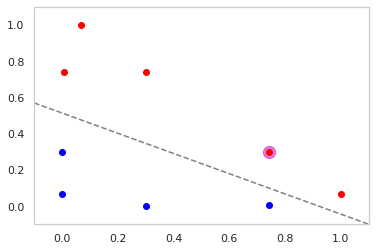

In [53]:
plt.scatter(x=c1_g1, y=c1_g2, c='blue')
plt.scatter(x=[x1_g], y=[x2_g], s=150, alpha=0.5, c="m")
plt.scatter(x=c2_g1, y=c2_g2, c='red')
x1, y1 = [-0.1, 1.1], [0.57, -0.1]
plt.plot(x1, y1, c='gray', ls='--')
plt.axis([-0.1, 1.1, -0.1, 1.1])

Note que com a utilização de kernels não adicionamos dimensões a nosso espaço, mas sim computamos novas features de acordo com uma função de kernel.

Observe que agora as amostras são linearmente separáveis. Neste caso nos perguntamos como escolher os pontos de referência. Geralmente esses pontos são calculados como todos os pontos do dataset, ou seja, cada exemplo se torna um ponto de referência e calculamos a RBF para todos. 

In [54]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', C=5))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

É importante destacar que quando utilizamos as funções de kernel nós não adicionamos features ao nosso conjunto de dados, mas sim calculamos uma distância "similuando" que estes dados tenham sido mapeados a num novo espaço. O gráfico acima apenas ilustra a distancia entre os pontos utilizando o kernel rbf em relação aos pontos de referência $\ell_1$ e $\ell_2$.

<h3>SVM Regression</h3>

Também é possível utilizarmos o SVM para problemas de regressão. Neste caso, o SVM busca coeficientes que minimizem uma loss onde apenas os resíduos mair que uma contante pré definida contribuiem par a funçãso de loss.

In [55]:
from sklearn.svm import LinearSVR

In [56]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Assim como na regressão polinomial, podemos lidar com problemas não lineares pelo SVR, apenas se faz necessário o uso de kernels.

In [57]:
from sklearn.svm import SVR

In [58]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)